In [403]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [404]:
from tensorflow.contrib.layers import fully_connected

In [405]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [406]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [407]:
training_data.shape

(175341, 45)

In [408]:
training_labels=training_data[:,43]

In [409]:
training_features=training_data[:,0:43]

In [410]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [411]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [412]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [413]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [414]:
proto=np.unique(training_features[:,2])

In [415]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [416]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [417]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [418]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [419]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [420]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [421]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [422]:
d=dict.fromkeys(proto)

In [423]:
l=d.keys()

In [424]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [425]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [426]:
training_features

array([[1, 0.121478, 119, ..., 1, 1, 0],
       [2, 0.6499020000000001, 119, ..., 1, 6, 0],
       [3, 1.623129, 119, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 91, ..., 3, 12, 0],
       [175340, 9e-06, 91, ..., 30, 30, 0],
       [175341, 9e-06, 91, ..., 30, 30, 0]], dtype=object)

In [427]:
training_features[:,2]

array([119, 119, 119, ..., 91, 91, 91], dtype=object)

In [428]:
training_features.shape

(175341, 43)

In [437]:
std_list=[]

In [438]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [439]:
training_features

array([[-1.7320409294121966, -0.191028809160501, 0.8240748895992412, ...,
        -0.7157136566119562, -0.7530740174872819, -0.12650796304435605],
       [-1.7320211730425215, -0.10948479464157926, 0.8240748895992412,
        ..., -0.7157136566119562, -0.2882570077810067,
        -0.12650796304435605],
       [-1.7320014166728464, 0.040699217852566784, 0.8240748895992412,
        ..., -0.595542566608582, -0.2882570077810067,
        -0.12650796304435605],
       ...,
       [1.7320014166728464, -0.20977335880169615, -0.5464576060067797,
        ..., -0.47537147660520784, 0.2695234038665234,
        -0.12650796304435605],
       [1.7320211730425215, -0.20977335880169615, -0.5464576060067797,
        ..., 2.769247953485894, 1.9428646388091138, -0.12650796304435605],
       [1.7320409294121966, -0.20977335880169615, -0.5464576060067797,
        ..., 2.769247953485894, 1.9428646388091138, -0.12650796304435605]],
      dtype=object)

In [440]:
std_list

[0.9999999999999998,
 1.0000000000000087,
 0.9999999999971673,
 0.999999999999386,
 0.9999999999991824,
 0.9999999999999767,
 1.0000000000000135,
 0.9999999999999991,
 0.9999999999999941,
 1.0000000000000362,
 0.9999999999956682,
 1.0000000000004043,
 1.000000000000031,
 1.0000000000000369,
 1.0000000000000153,
 0.9999999999999932,
 1.0000000000000027,
 0.9999999999999899,
 1.0000000000000089,
 0.9999999999999862,
 0.999999999999863,
 1.0000000000012048,
 1.0000000000002036,
 1.0000000000003921,
 1.0000000000000826,
 1.0000000000042908,
 1.000000000000019,
 1.0000000000000953,
 0.9999999999997725,
 0.9999999999998201,
 1.0000000000000004,
 0.9999999999998854,
 1.000000000000155,
 1.0000000000000036,
 0.9999999999999776,
 1.000000000000118,
 1.0000000000000417,
 1.0000000000000033,
 1.0000000000000033,
 0.9999999999997836,
 0.9999999999998705,
 0.9999999999997095,
 0.9999999999999941]

In [441]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [502]:
lr=0.005
actf=tf.nn.elu

In [503]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [504]:
initializer=tf.variance_scaling_initializer()

In [505]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [506]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [507]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [508]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [509]:
all_weights=[w1]+[w2]+[w3]+[w4]

l1_regularizer=tf.contrib.layers.l1_regularizer(scale=0.005,scope=None)
regularization_penalty=tf.contrib.layers.apply_regularization(l1_regularizer,all_weights)

In [510]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [511]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss+regularization_penalty)

In [512]:
init=tf.global_variables_initializer()

In [513]:
num_epoch=2000
batch_size=100000

In [514]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [515]:
x=[]
y=[]
l=[]

In [516]:
with tf.Session() as sess:
    sess.run(init)
    vars=tf.trainable_variables()
    vars_vals=sess.run(vars)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size
        #learning rate decay
        lr = lr * (0.3 **(epoch//25))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)  

epoch 0 loss 0.9817793965339661
epoch 1 loss 0.9899733662605286
epoch 2 loss 0.9899576902389526
epoch 3 loss 0.9689151048660278
epoch 4 loss 0.9535502195358276
epoch 5 loss 0.9134321808815002
epoch 6 loss 0.8985082507133484
epoch 7 loss 0.8965782523155212
epoch 8 loss 0.9125246405601501
epoch 9 loss 0.8813478946685791
epoch 10 loss 0.8994885087013245
epoch 11 loss 0.857437252998352
epoch 12 loss 0.8479983806610107
epoch 13 loss 0.8378368616104126
epoch 14 loss 0.8434218764305115
epoch 15 loss 0.8106845021247864
epoch 16 loss 0.8044611811637878
epoch 17 loss 0.8095787167549133
epoch 18 loss 0.7937539219856262
epoch 19 loss 0.7638006210327148
epoch 20 loss 0.7399370670318604
epoch 21 loss 0.73054438829422
epoch 22 loss 0.7561869621276855
epoch 23 loss 0.7529856562614441
epoch 24 loss 0.7266246676445007
epoch 25 loss 0.7043144106864929
epoch 26 loss 0.7329244613647461
epoch 27 loss 0.7037133574485779
epoch 28 loss 0.7163442373275757
epoch 29 loss 0.6546512842178345
epoch 30 loss 0.6924108

epoch 244 loss 0.46449121832847595
epoch 245 loss 0.4526442587375641
epoch 246 loss 0.47309213876724243
epoch 247 loss 0.4561085104942322
epoch 248 loss 0.49020716547966003
epoch 249 loss 0.4570688307285309
epoch 250 loss 0.46851658821105957
epoch 251 loss 0.4574953615665436
epoch 252 loss 0.4488242268562317
epoch 253 loss 0.4471137821674347
epoch 254 loss 0.47153744101524353
epoch 255 loss 0.4700373113155365
epoch 256 loss 0.43341144919395447
epoch 257 loss 0.4400333762168884
epoch 258 loss 0.4498251676559448
epoch 259 loss 0.46680283546447754
epoch 260 loss 0.46169352531433105
epoch 261 loss 0.4661836624145508
epoch 262 loss 0.4321868121623993
epoch 263 loss 0.4455340504646301
epoch 264 loss 0.4537715017795563
epoch 265 loss 0.4407297670841217
epoch 266 loss 0.4594225287437439
epoch 267 loss 0.4606255292892456
epoch 268 loss 0.4538155198097229
epoch 269 loss 0.46356475353240967
epoch 270 loss 0.4539075791835785
epoch 271 loss 0.4479462206363678
epoch 272 loss 0.43964871764183044
epoc

epoch 483 loss 0.37552279233932495
epoch 484 loss 0.36427757143974304
epoch 485 loss 0.37365177273750305
epoch 486 loss 0.3577819764614105
epoch 487 loss 0.3583337068557739
epoch 488 loss 0.3534722626209259
epoch 489 loss 0.3434284031391144
epoch 490 loss 0.36317741870880127
epoch 491 loss 0.35825854539871216
epoch 492 loss 0.3600088953971863
epoch 493 loss 0.36517494916915894
epoch 494 loss 0.3763379156589508
epoch 495 loss 0.3592807650566101
epoch 496 loss 0.3546733558177948
epoch 497 loss 0.36602839827537537
epoch 498 loss 0.38618138432502747
epoch 499 loss 0.3749106228351593
epoch 500 loss 0.34798571467399597
epoch 501 loss 0.37355124950408936
epoch 502 loss 0.3603215217590332
epoch 503 loss 0.36815547943115234
epoch 504 loss 0.36869609355926514
epoch 505 loss 0.3646446466445923
epoch 506 loss 0.35629454255104065
epoch 507 loss 0.358988881111145
epoch 508 loss 0.3649989068508148
epoch 509 loss 0.3880007565021515
epoch 510 loss 0.3595138192176819
epoch 511 loss 0.3656131327152252
ep

epoch 722 loss 0.3724094331264496
epoch 723 loss 0.37319815158843994
epoch 724 loss 0.3535706698894501
epoch 725 loss 0.3601055443286896
epoch 726 loss 0.3584540784358978
epoch 727 loss 0.3794965445995331
epoch 728 loss 0.3404806852340698
epoch 729 loss 0.3533141314983368
epoch 730 loss 0.3469911217689514
epoch 731 loss 0.3592361509799957
epoch 732 loss 0.37806737422943115
epoch 733 loss 0.35224711894989014
epoch 734 loss 0.34618812799453735
epoch 735 loss 0.3381873071193695
epoch 736 loss 0.35653987526893616
epoch 737 loss 0.3713902235031128
epoch 738 loss 0.3461318016052246
epoch 739 loss 0.3615756928920746
epoch 740 loss 0.35239243507385254
epoch 741 loss 0.3785284161567688
epoch 742 loss 0.3488294780254364
epoch 743 loss 0.37254324555397034
epoch 744 loss 0.3533730208873749
epoch 745 loss 0.36737382411956787
epoch 746 loss 0.3469758927822113
epoch 747 loss 0.36843594908714294
epoch 748 loss 0.3684263229370117
epoch 749 loss 0.3419038951396942
epoch 750 loss 0.36596736311912537
epoc

epoch 961 loss 0.3545517027378082
epoch 962 loss 0.3604550063610077
epoch 963 loss 0.3534250557422638
epoch 964 loss 0.34835150837898254
epoch 965 loss 0.354238361120224
epoch 966 loss 0.3513864576816559
epoch 967 loss 0.3693602383136749
epoch 968 loss 0.35676488280296326
epoch 969 loss 0.35092389583587646
epoch 970 loss 0.3691762685775757
epoch 971 loss 0.36293235421180725
epoch 972 loss 0.36166396737098694
epoch 973 loss 0.34898754954338074
epoch 974 loss 0.3568706512451172
epoch 975 loss 0.3628850281238556
epoch 976 loss 0.3607534170150757
epoch 977 loss 0.3510099947452545
epoch 978 loss 0.3579743206501007
epoch 979 loss 0.3426341712474823
epoch 980 loss 0.3622855246067047
epoch 981 loss 0.3554490804672241
epoch 982 loss 0.3539668619632721
epoch 983 loss 0.35277217626571655
epoch 984 loss 0.3596233129501343
epoch 985 loss 0.3686080873012543
epoch 986 loss 0.3698972761631012
epoch 987 loss 0.3547601103782654
epoch 988 loss 0.3459141254425049
epoch 989 loss 0.34628307819366455
epoch 9

epoch 1194 loss 0.35318392515182495
epoch 1195 loss 0.346652626991272
epoch 1196 loss 0.34980693459510803
epoch 1197 loss 0.35723406076431274
epoch 1198 loss 0.3599512577056885
epoch 1199 loss 0.35608482360839844
epoch 1200 loss 0.3406313955783844
epoch 1201 loss 0.3417312800884247
epoch 1202 loss 0.33518487215042114
epoch 1203 loss 0.3586510121822357
epoch 1204 loss 0.3406699597835541
epoch 1205 loss 0.34864649176597595
epoch 1206 loss 0.34523141384124756
epoch 1207 loss 0.3639560341835022
epoch 1208 loss 0.3539109230041504
epoch 1209 loss 0.3532237410545349
epoch 1210 loss 0.3518295884132385
epoch 1211 loss 0.33818891644477844
epoch 1212 loss 0.34679725766181946
epoch 1213 loss 0.3648533225059509
epoch 1214 loss 0.34870877861976624
epoch 1215 loss 0.3552705645561218
epoch 1216 loss 0.34800899028778076
epoch 1217 loss 0.3536599576473236
epoch 1218 loss 0.3438307046890259
epoch 1219 loss 0.35087883472442627
epoch 1220 loss 0.34263911843299866
epoch 1221 loss 0.35016384720802307
epoch 1

epoch 1426 loss 0.3478415012359619
epoch 1427 loss 0.33554261922836304
epoch 1428 loss 0.3346470892429352
epoch 1429 loss 0.337252676486969
epoch 1430 loss 0.351413756608963
epoch 1431 loss 0.34528031945228577
epoch 1432 loss 0.33528074622154236
epoch 1433 loss 0.34090760350227356
epoch 1434 loss 0.3376210331916809
epoch 1435 loss 0.3446972072124481
epoch 1436 loss 0.3482402265071869
epoch 1437 loss 0.3496609032154083
epoch 1438 loss 0.3591829240322113
epoch 1439 loss 0.35709330439567566
epoch 1440 loss 0.3366204798221588
epoch 1441 loss 0.3632245659828186
epoch 1442 loss 0.35045239329338074
epoch 1443 loss 0.3389640748500824
epoch 1444 loss 0.3584722876548767
epoch 1445 loss 0.3212421238422394
epoch 1446 loss 0.34875157475471497
epoch 1447 loss 0.33512482047080994
epoch 1448 loss 0.3451146185398102
epoch 1449 loss 0.3371608555316925
epoch 1450 loss 0.342627614736557
epoch 1451 loss 0.3405728042125702
epoch 1452 loss 0.353854238986969
epoch 1453 loss 0.3527602255344391
epoch 1454 loss 

epoch 1658 loss 0.324832946062088
epoch 1659 loss 0.34409016370773315
epoch 1660 loss 0.3328058123588562
epoch 1661 loss 0.35073497891426086
epoch 1662 loss 0.34446853399276733
epoch 1663 loss 0.3348684310913086
epoch 1664 loss 0.35594189167022705
epoch 1665 loss 0.338076114654541
epoch 1666 loss 0.35258594155311584
epoch 1667 loss 0.34302249550819397
epoch 1668 loss 0.34603333473205566
epoch 1669 loss 0.3410665690898895
epoch 1670 loss 0.33276546001434326
epoch 1671 loss 0.32813817262649536
epoch 1672 loss 0.3439837694168091
epoch 1673 loss 0.3533843755722046
epoch 1674 loss 0.35553857684135437
epoch 1675 loss 0.34256651997566223
epoch 1676 loss 0.34426969289779663
epoch 1677 loss 0.34977278113365173
epoch 1678 loss 0.33090266585350037
epoch 1679 loss 0.3342166543006897
epoch 1680 loss 0.32921648025512695
epoch 1681 loss 0.34485259652137756
epoch 1682 loss 0.34130093455314636
epoch 1683 loss 0.33146771788597107
epoch 1684 loss 0.3540570139884949
epoch 1685 loss 0.33837470412254333
epo

epoch 1890 loss 0.3478658199310303
epoch 1891 loss 0.3276881277561188
epoch 1892 loss 0.3377728760242462
epoch 1893 loss 0.3204902410507202
epoch 1894 loss 0.3455961346626282
epoch 1895 loss 0.33632349967956543
epoch 1896 loss 0.3427785336971283
epoch 1897 loss 0.33873090147972107
epoch 1898 loss 0.35082972049713135
epoch 1899 loss 0.33190813660621643
epoch 1900 loss 0.33033204078674316
epoch 1901 loss 0.3409934341907501
epoch 1902 loss 0.35354098677635193
epoch 1903 loss 0.34766802191734314
epoch 1904 loss 0.35399696230888367
epoch 1905 loss 0.3443153500556946
epoch 1906 loss 0.352579802274704
epoch 1907 loss 0.34496942162513733
epoch 1908 loss 0.33712756633758545
epoch 1909 loss 0.3280784785747528
epoch 1910 loss 0.3279559910297394
epoch 1911 loss 0.3327725827693939
epoch 1912 loss 0.3555680811405182
epoch 1913 loss 0.32832714915275574
epoch 1914 loss 0.3417142331600189
epoch 1915 loss 0.35220080614089966
epoch 1916 loss 0.353180855512619
epoch 1917 loss 0.3342560827732086
epoch 1918

In [517]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [518]:
sum_weights

[1.151300748810172,
 0.9490443295799196,
 0.07747162418672815,
 0.7343051517964341,
 -0.08578417939133942,
 -0.2069420237094164,
 -0.28979265107773244,
 0.6962279630824924,
 -0.574595963495085,
 0.9394773114472628,
 0.5506136391777545,
 0.23747944261413068,
 0.31200753955636173,
 -0.9916524443542585,
 0.23990632174536586,
 0.180192201922182,
 0.0052563229110091925,
 -0.42335980758070946,
 -0.023838347755372524,
 0.47306083771400154,
 0.04890996147878468,
 0.3370915409177542,
 -1.0200614277273417,
 -0.11144091805181233,
 -0.09947358444333076,
 0.759551489725709,
 -0.8130397000350058,
 0.2288043568842113,
 0.7408924642950296,
 -0.09223526623100042,
 -0.9361194893717766,
 0.5427964772097766,
 0.532413775101304,
 -0.5161592084914446,
 0.3441988588310778,
 -0.6139899762347341,
 0.334832270629704,
 -1.2163078740704805,
 0.7458539409562945,
 -0.641602385789156,
 1.08791265450418,
 -0.2995637741405517,
 -0.23010939173400402]

In [519]:
std_list

[0.9999999999999998,
 1.0000000000000087,
 0.9999999999971673,
 0.999999999999386,
 0.9999999999991824,
 0.9999999999999767,
 1.0000000000000135,
 0.9999999999999991,
 0.9999999999999941,
 1.0000000000000362,
 0.9999999999956682,
 1.0000000000004043,
 1.000000000000031,
 1.0000000000000369,
 1.0000000000000153,
 0.9999999999999932,
 1.0000000000000027,
 0.9999999999999899,
 1.0000000000000089,
 0.9999999999999862,
 0.999999999999863,
 1.0000000000012048,
 1.0000000000002036,
 1.0000000000003921,
 1.0000000000000826,
 1.0000000000042908,
 1.000000000000019,
 1.0000000000000953,
 0.9999999999997725,
 0.9999999999998201,
 1.0000000000000004,
 0.9999999999998854,
 1.000000000000155,
 1.0000000000000036,
 0.9999999999999776,
 1.000000000000118,
 1.0000000000000417,
 1.0000000000000033,
 1.0000000000000033,
 0.9999999999997836,
 0.9999999999998705,
 0.9999999999997095,
 0.9999999999999941]

In [520]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=std_list[i]*sum_weights[i]
    var_imp.append(prod)

In [521]:
var_imp

[1.1513007488101719,
 0.9490443295799278,
 0.07747162418650869,
 0.7343051517959832,
 -0.08578417939126928,
 -0.20694202370941156,
 -0.2897926510777364,
 0.6962279630824917,
 -0.5745959634950817,
 0.9394773114472967,
 0.5506136391753694,
 0.2374794426142267,
 0.31200753955637145,
 -0.991652444354295,
 0.23990632174536952,
 0.18019220192218077,
 0.005256322911009206,
 -0.4233598075807052,
 -0.023838347755372736,
 0.47306083771399504,
 0.04890996147877798,
 0.3370915409181603,
 -1.0200614277275493,
 -0.11144091805185603,
 -0.09947358444333898,
 0.759551489728968,
 -0.8130397000350214,
 0.2288043568842331,
 0.7408924642948611,
 -0.09223526623098384,
 -0.936119489371777,
 0.5427964772097145,
 0.5324137751013865,
 -0.5161592084914465,
 0.3441988588310701,
 -0.6139899762348064,
 0.334832270629718,
 -1.2163078740704845,
 0.745853940956297,
 -0.6416023857890172,
 1.0879126545040392,
 -0.29956377414046464,
 -0.23010939173400266]

In [522]:
features=list(range(1,44))

In [523]:
plt.rcParams['figure.figsize']=(20,20)

Text(0,0.5,'Feature Importance Values')

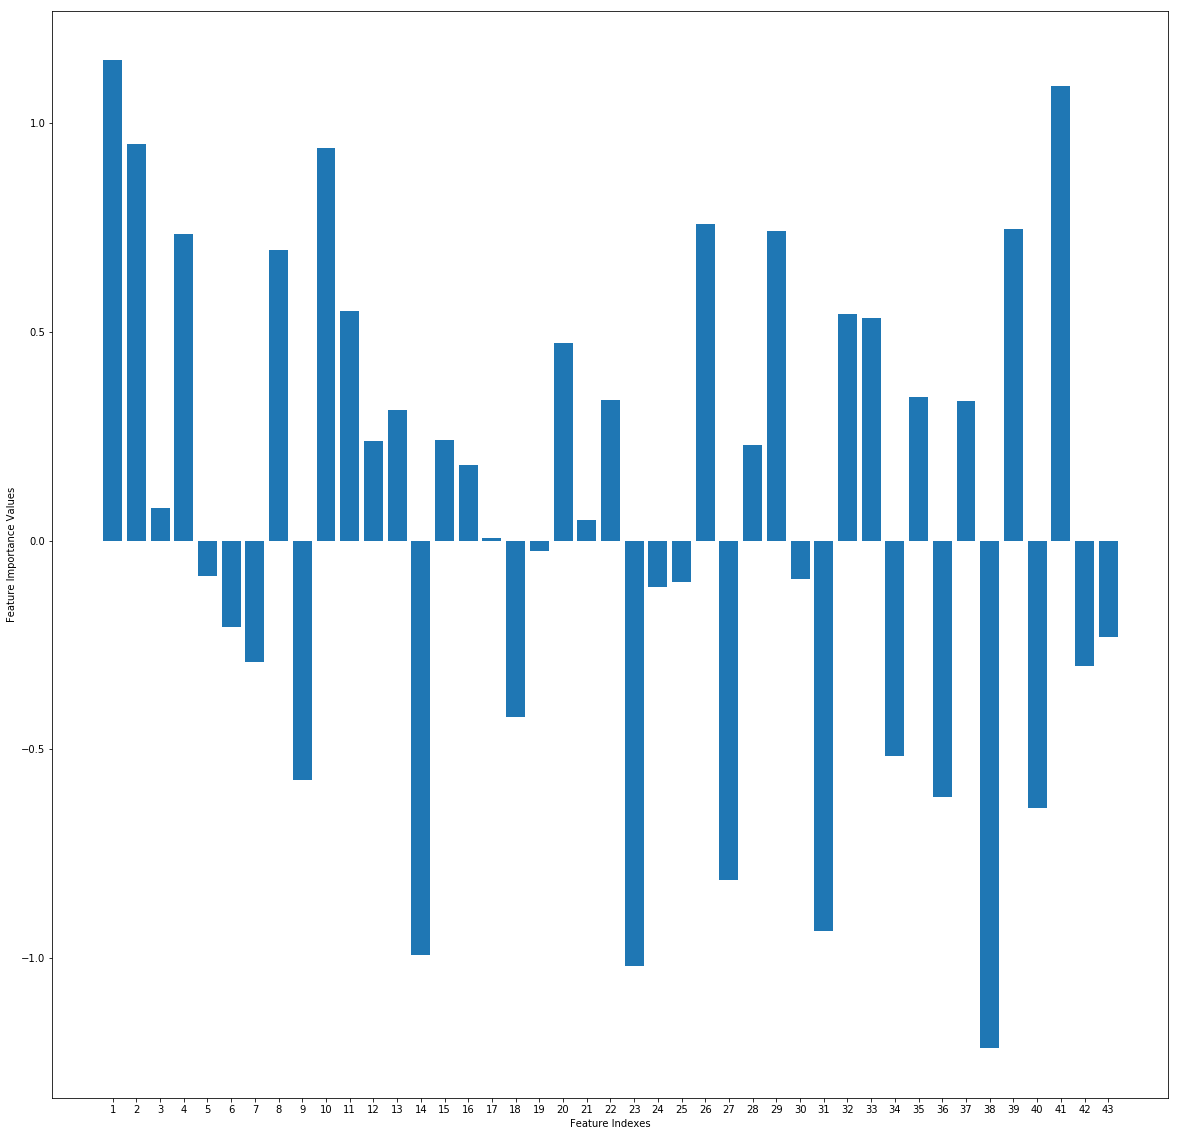

In [524]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")

In [525]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [526]:
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [527]:
for x in best_features:
    print(feature_names[x])

id
ct_src_ltm
dur
rate
synack
ct_ftp_cmd
dmean
service
sbytes
sttl


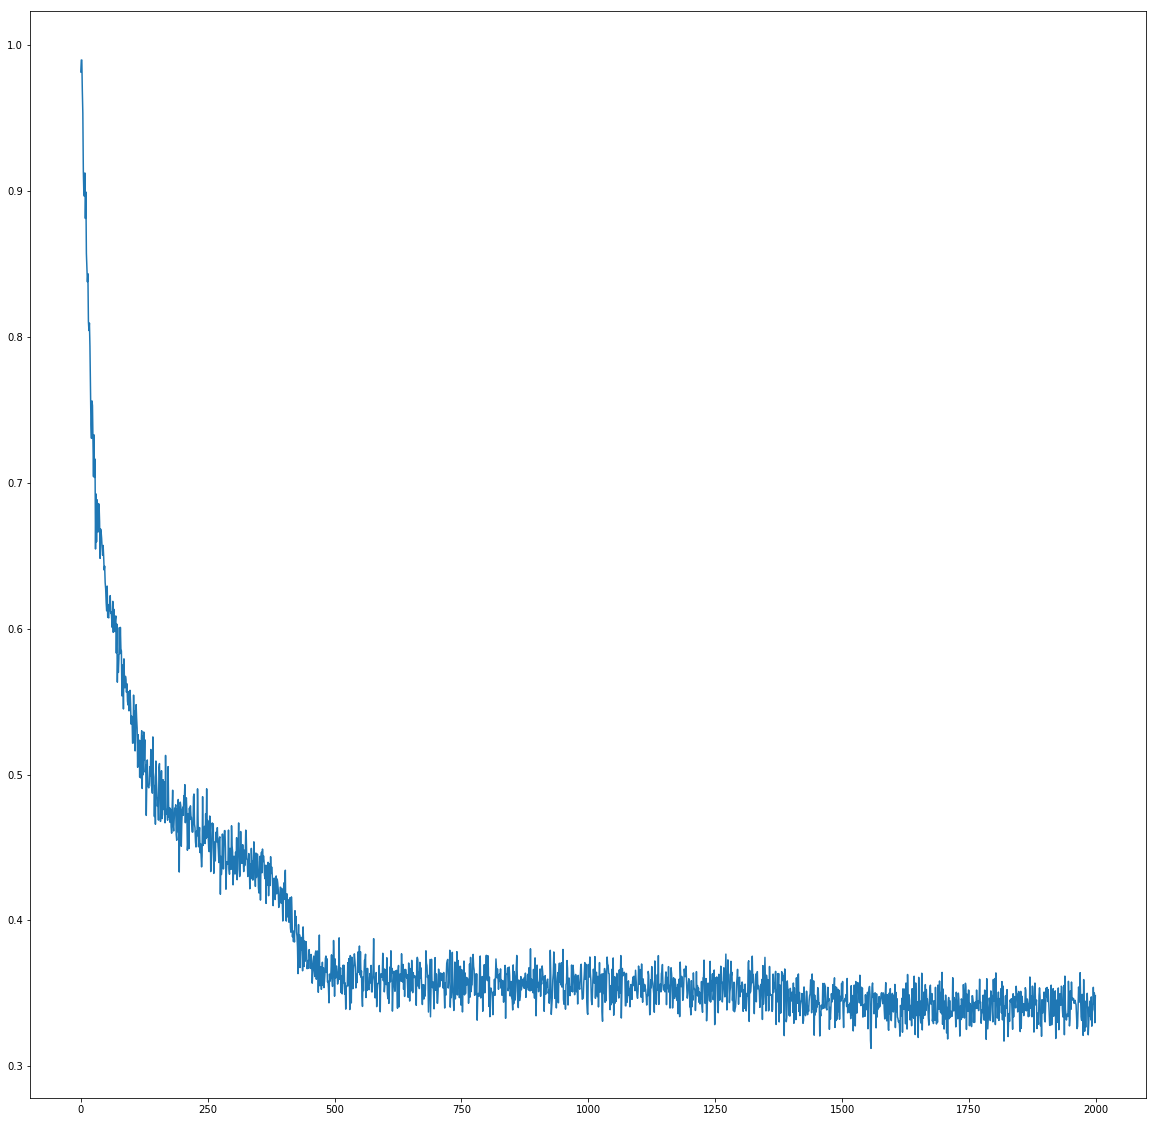

In [530]:
x=list(range(0,2000))
plt.plot(x,y)

In [529]:
print(np.var(var_imp))

0.35924022146294143
